In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("37 train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [5]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [6]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

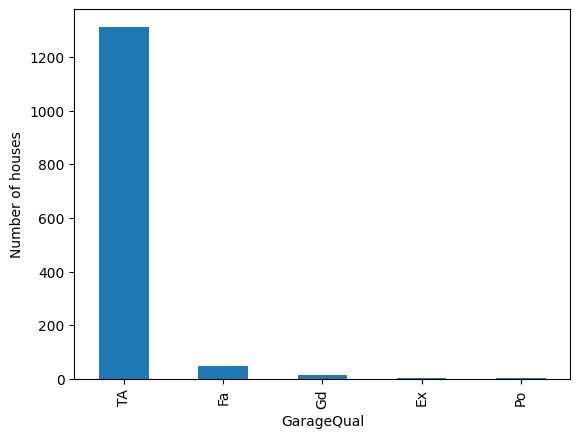

In [7]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GarageQual")
plt.ylabel("Number of houses")
plt.show()

In [8]:
df["GarageQual"].mode()

0    TA
Name: GarageQual, dtype: object

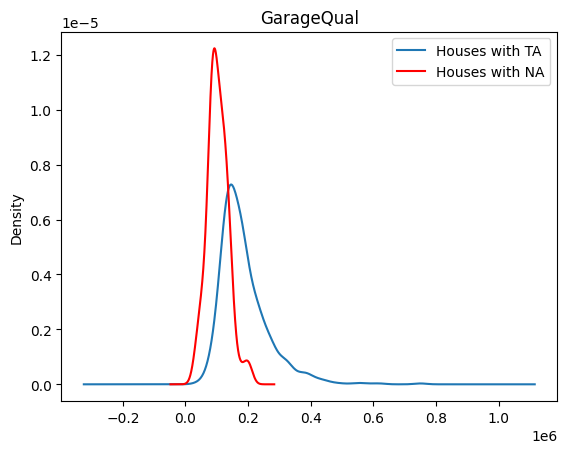

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax = ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax, color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines,labels, loc='best')

plt.title("GarageQual")
plt.show()

In [12]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [13]:
df['GarageQual'].fillna('TA', inplace=True)

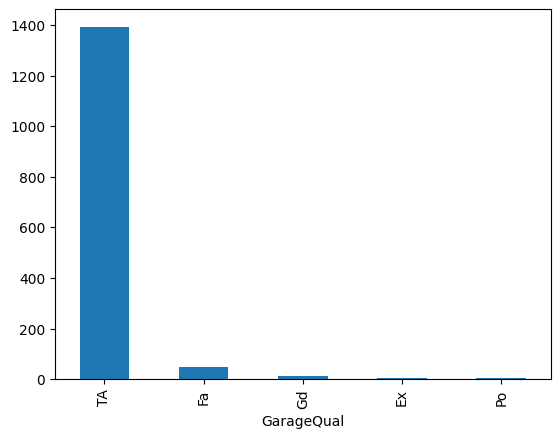

In [14]:
df['GarageQual'].value_counts().plot(kind='bar')
plt.show()

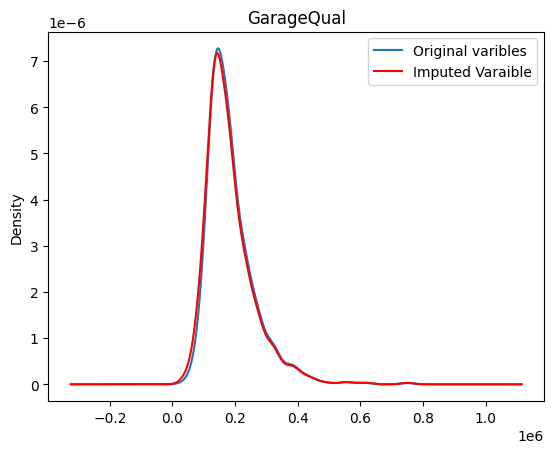

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax = ax)

#distribution of the variables after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde',ax=ax, color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original varibles', 'Imputed Varaible']
ax.legend(lines,labels, loc='best')

plt.title("GarageQual")
plt.show()

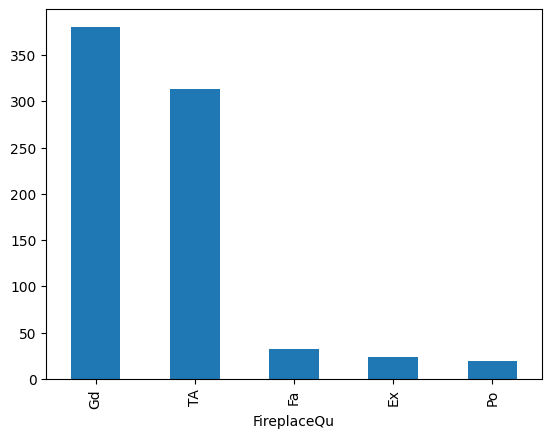

In [18]:
df['FireplaceQu'].value_counts().plot(kind='bar')
plt.show()

In [19]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

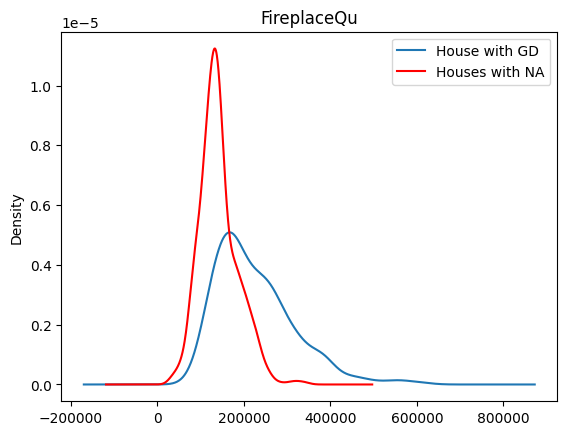

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu'] =='Gd']['SalePrice'].plot(kind='kde', ax = ax)

#distribution of the variables after imputation
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax, color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['House with GD', 'Houses with NA']
ax.legend(lines,labels, loc='best')

plt.title("FireplaceQu")
plt.show()

In [21]:
temp = df[df['FireplaceQu'] == 'Gd']['SalePrice']

In [22]:
df['FireplaceQu'].fillna('Gd', inplace=True)

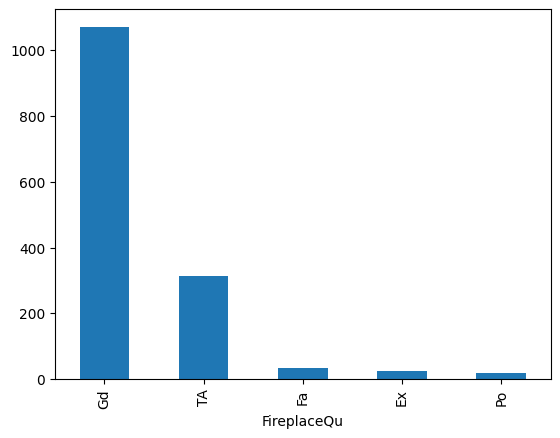

In [24]:
df['FireplaceQu'].value_counts().plot(kind='bar')
plt.show()

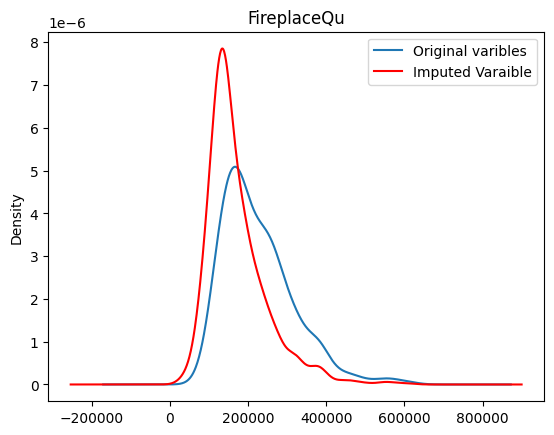

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax = ax)

#distribution of the variables after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde',ax=ax, color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original varibles', 'Imputed Varaible']
ax.legend(lines,labels, loc='best')

plt.title("FireplaceQu")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
imputer = SimpleImputer(strategy='most_frequent')

In [31]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

In [32]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)